In [4]:
import re

def process_line(stdout):
    energy = []
    sign = []
    time = []

    for line in str(stdout).split("\\n"):

        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            
    return energy, sign, time

In [5]:
import os
os.chdir("../build")

# original shastry-surtherland model

In [7]:
import subprocess

out = subprocess.Popen(["./SS", "-L", "2", "-T", "1", "-H", "0", "-J1", "1", "-D", "1" ,"-m", "10000", "-n", "1000000", "-M", "shastry"], 
           stdout=subprocess.PIPE, 
           stderr=subprocess.STDOUT)
stdout,stderr = out.communicate()
# print(stdout)

### sampling energies for several temperature

In [9]:
import numpy as np
T =  np.logspace(-1, 1, num=10)

In [17]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for t in T:
    out = subprocess.Popen(["./SS", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0",  "-J1", "1", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)

KeyboardInterrupt: 

In [11]:
energy_v1 = np.array(energy_array)
sign_v1 = np.array(sign_array)

## calculate exact value

In [15]:
import numpy as np
E = np.load("../doc/data/shastry_exact.npy")
tmp = np.einsum("i,j->ij",-1/T, E)
energy_exact = np.einsum("j,ij->i",E,np.exp(tmp))/np.einsum("ij->i", np.exp(tmp))

### plot together with exact value

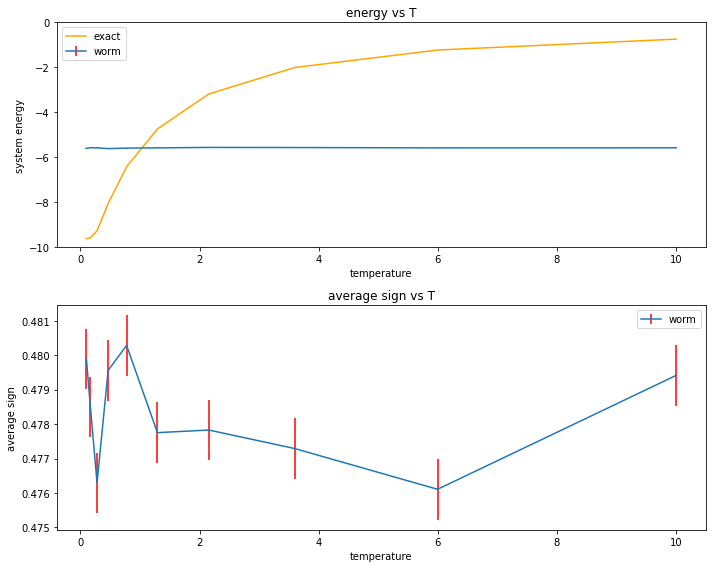

In [16]:
import matplotlib.pyplot as plt
T =  np.logspace(-1, 1, num=10)

fig = plt.figure(figsize = (10,8))
 
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_v1[0:,0], yerr = energy_v1[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title('energy vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_v1[0:,0], yerr = sign_v1[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

# unitary transformed shastry-surtherland model

In [53]:
energy_array = []
sign_array = []
time_array = []
T =  np.logspace(-1, 1, num=10)
for t in T:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0",  "-J1", "0.5", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
#     print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)

In [54]:
energy_v2 = np.array(energy_array)
sign_v2 = np.array(sign_array)

### plot together with exact value

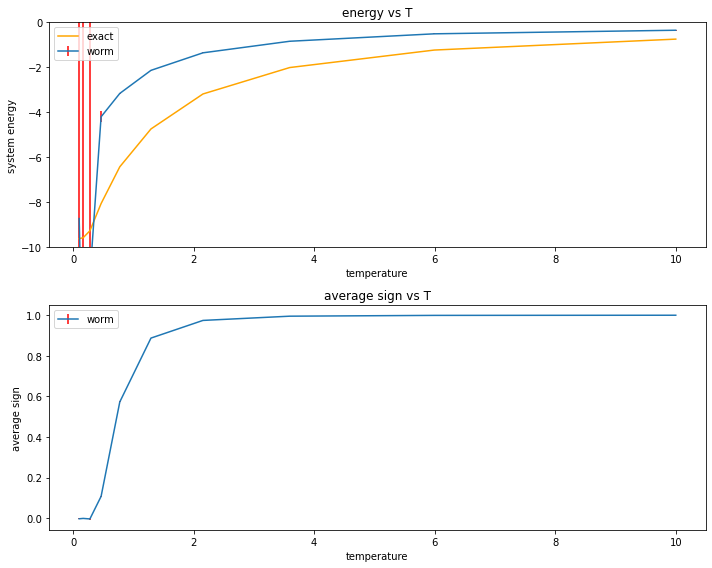

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_v2[0:,0], yerr = energy_v2[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title('energy vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_v2[0:,0], yerr = sign_v2[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

## compare average sign

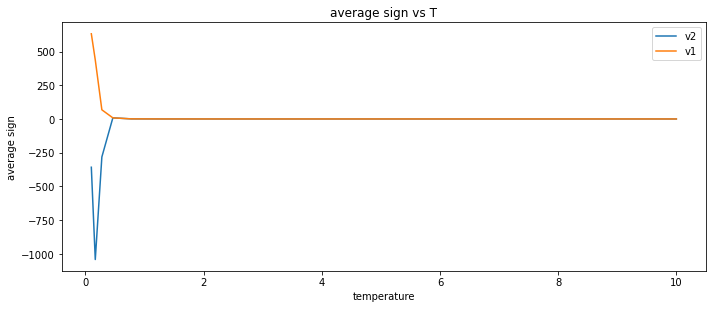

In [56]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(T[0:],1/sign_v2[0:,0],label='v2')
ax1.plot(T[0:],1/sign_v1[0:,0],label='v1')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

# change J1 with fixed temperature (T = 1)

In [37]:
import numpy as np
J1 = np.linspace(0, 1, 21)

In [42]:
import subprocess
energy_array = []
sign_array = []
time_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "1", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
energy_j_v1 = np.array(energy_array)
sign_j_v1 = np.array(sign_array)
time_j_v1 = np.array(time_array)

J1 = 0.0 [-3.68458, 0.00976559]
J1 = 0.05 [-3.69578, 0.0103898]
J1 = 0.1 [-3.68134, 0.0122094]
J1 = 0.15000000000000002 [-3.69159, 0.0150306]
J1 = 0.2 [-3.73045, 0.0193122]
J1 = 0.25 [-3.74707, 0.025697]
J1 = 0.30000000000000004 [-3.73915, 0.0340508]
J1 = 0.35000000000000003 [-3.82823, 0.0480545]
J1 = 0.4 [-3.80976, 0.069539]
J1 = 0.45 [-3.9911, 0.103157]
J1 = 0.5 [-4.17994, 0.162295]
J1 = 0.55 [-4.26159, 0.25642]
J1 = 0.6000000000000001 [-4.36321, 0.400785]
J1 = 0.65 [-4.49932, 0.698391]
J1 = 0.7000000000000001 [-3.77173, 1.2625]
J1 = 0.75 [-5.19412, 1.77813]
J1 = 0.8 [-6.38199, 2.61623]
J1 = 0.8500000000000001 [-4.99004, 4.03096]
J1 = 0.9 [2.09474, 11.2179]
J1 = 0.9500000000000001 [-7.45368, 7.05711]
J1 = 1.0 [-9.13778, 6.27909]


In [43]:
import subprocess
energy_array = []
sign_array = []
time_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "1", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
energy_j_v2 = np.array(energy_array)
sign_j_v2 = np.array(sign_array)
time_j_v2 = np.array(time_array)

J1 = 0.0 [-3.73115, 0.00666537]
J1 = 0.05 [-3.6906, 0.00762927]
J1 = 0.1 [-3.7029, 0.00980709]
J1 = 0.15000000000000002 [-3.66989, 0.0126385]
J1 = 0.2 [-3.71914, 0.0171099]
J1 = 0.25 [-3.74672, 0.0230433]
J1 = 0.30000000000000004 [-3.76068, 0.0314661]
J1 = 0.35000000000000003 [-3.81409, 0.0448586]
J1 = 0.4 [-3.88609, 0.0638078]
J1 = 0.45 [-3.98634, 0.0990403]
J1 = 0.5 [-4.03134, 0.157683]
J1 = 0.55 [-4.27233, 0.242174]
J1 = 0.6000000000000001 [-4.58001, 0.392573]
J1 = 0.65 [-5.20807, 0.647234]
J1 = 0.7000000000000001 [-5.40944, 0.908712]
J1 = 0.75 [-5.84413, 1.8634]
J1 = 0.8 [-6.68762, 2.30756]
J1 = 0.8500000000000001 [-5.48632, 4.18574]
J1 = 0.9 [-29.4522, 108.937]
J1 = 0.9500000000000001 [-8.42721, 6.93132]
J1 = 1.0 [-27.7237, 42.3594]


In [27]:
import subprocess
energy_array = []
sign_array = []
time_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "1", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
energy_j_v3 = np.array(energy_array)
sign_j_v3 = np.array(sign_array)
time_j_v3 = np.array(time_array)

J1 = 0.0 [-1.80316, 0.00762703]
J1 = 0.5 [-2.60204, 0.0195531]
J1 = 1.0 [-5.59222, 0.105262]
J1 = 1.5 [-11.1925, 0.508011]
J1 = 2.0 [-18.5628, 1.26933]
J1 = 2.5 [-24.8933, 1.86445]
J1 = 3.0 [-31.093, 2.02977]
J1 = 3.5 [-36.7035, 2.27271]
J1 = 4.0 [-42.3441, 2.95087]
J1 = 4.5 [-47.168, 3.37701]
J1 = 5.0 [-54.0361, 3.29579]
J1 = 5.5 [-58.9064, 3.722]
J1 = 6.0 [-65.7061, 3.6454]
J1 = 6.5 [-71.5336, 3.9933]
J1 = 7.0 [-76.8461, 4.30085]
J1 = 7.5 [-82.7223, 4.18681]
J1 = 8.0 [-87.856, 4.72952]
J1 = 8.5 [-93.4415, 4.89573]
J1 = 9.0 [-98.8372, 5.03736]
J1 = 9.5 [-104.559, 5.6479]
J1 = 10.0 [-110.393, 5.34735]


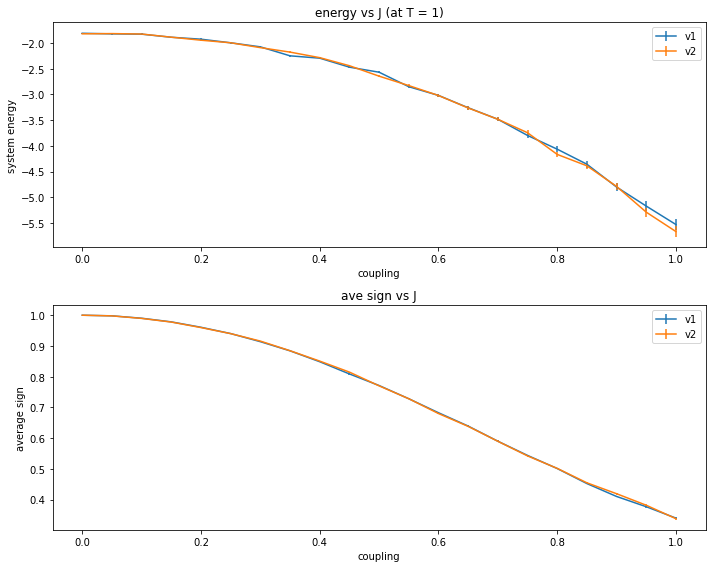

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(J1[0:],energy_j_v1[0:,0], yerr = energy_j_v1[0:,1], label='v1')
ax1.errorbar(J1[0:],energy_j_v2[0:,0], yerr = energy_j_v2[0:,1], label='v2')
# ax1.errorbar(J1[0:],energy_j_v3[0:,0], yerr = energy_j_v3[0:,1], label='v3')


ax1.set_title('energy vs J (at T = 1)')
ax1.set_xlabel('coupling')
ax1.set_ylabel('system energy')
# ax1.set_ylim(-120, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)

ax1.errorbar(J1[0:],sign_j_v1[0:,0], yerr = sign_j_v1[0:,1], label='v1')
ax1.errorbar(J1[0:],sign_j_v2[0:,0], yerr = sign_j_v2[0:,1], label='v2')
# ax1.errorbar(J1[0:],sign_j_v3[0:,0], yerr = sign_j_v3[0:,1], label='v3')


ax1.set_title('ave sign vs J')
ax1.set_xlabel('coupling')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()